# Part 1. Data Cleaning

1. (10 pts) Please write codes to address all data issues you identified in your dataset.

2. (5 pts) In your report, please briefly
- Discuss all issues your team addressed in step 1 by category (for example, missing data, inconsistent data, duplicated data, irrelevant data, outliers). It is OK to leave certain categories blank if your data does not have that issue.
- Paste the key line of the code of your data cleaning and the screenshot of relevant results in your report.

We identified the following issues in the dataset:

- Missing data
- Irrelevant data

To address these issues, we performed the following data cleaning steps.

In [16]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('reviews.csv')

In [17]:
# Preview the first 5 lines of the loaded data
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [18]:
# Check for missing data
print(df.isnull().sum())

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    2162
at                         0
replyContent            6677
repliedAt               6677
sortOrder                  0
appId                      0
dtype: int64


In [19]:
# Calculate what percentage of the data is missing for each column (reviewCreatedVersion, replyContent, repliedAt)
print(df.isnull().sum() / len(df))

reviewId                0.000000
userName                0.000000
userImage               0.000000
content                 0.000000
score                   0.000000
thumbsUpCount           0.000000
reviewCreatedVersion    0.173029
at                      0.000000
replyContent            0.534374
repliedAt               0.534374
sortOrder               0.000000
appId                   0.000000
dtype: float64


Fill the null values of "reviewCreatedVersion" with a default value of "Unkown". Leave the null values of "replyContent" as it is, as well as "repliedAt" considering not all reviews must have replies.

In [20]:
# Fill in the missing data
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('Unknown')

In [21]:
# Check for Duplicate Data
print(df.duplicated().sum())

0


In [22]:
# Check for inconsistent scores or outliers
print(df['score'].value_counts())

5    2879
4    2775
1    2506
2    2344
3    1991
Name: score, dtype: int64


The columns "userImage", "sortOrder", "appId" will be dropped as they are irrelevant to the analysis. The first one contains the user's profile picture, which is not needed for the analysis. The second one is the order of the reviews, which is not needed for the analysis. The third one is the app ID, which is also irrelevant to the analysis.

In [23]:
# Drop the unnecessary columns
df = df.drop(['userImage', 'sortOrder'], axis=1)

(5 pts) In your report, please briefly
    
- Discuss all issues your team addressed in step 1 by category (for example, missing data, inconsistent data, duplicated data, irrelevant data, outliers). It is OK to leave certain categories blank if your data does not have that issue.

- Paste the key line of the code of your data cleaning and the screenshot of relevant results in your report.

The issues we addressed in step 1 are: 

- Missing data: There were missing values in the dataset, for the columns of "reviewCreatedVersion", "replyContent", and "repliedAt". We filled the missing values of "reviewCreatedVersion" with a default value of "Unkown". We left the missing values of "replyContent" as it is, as well as "repliedAt" considering not all reviews must have replies.

- Removing irrelevant data: The columns "userImage" and "sortOrder" will be dropped as they are irrelevant to the analysis. The first one contains the user's profile picture, which is not needed for the analysis. The second one is the order of the reviews, which is not needed for the analysis. 

The data was consistent, with no identified duplicates. Not outliers were identified.

Here is the code to address these issues:

- Fill in the missing data
- df['reviewCreatedVersion'] = df['reviewCreatedVersion'].fillna('Unknown')

And also

- Drop the unnecessary columns
- df = df.drop(['userImage', 'sortOrder'], axis=1)

# Part 2. EDA (15 pts)

1. (15 pts) Please perform the exploratory data analyses (EDA) you proposed from M1 with the cleaned dataset. You are free to use any tools you prefer to perform this task, such as Tableau, Python, and Excel. Make sure your method and EDA results are correct. In your report, please briefly

- Discuss all EDA your team performed. Using visualization to show your EDA results is encouraged.
- Write one or several paragraphs of managerial insights you obtained from each EDA.
- Paste the screenshots of the key steps of your ERD and relevant results in your report.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Show the first 5 rows of the dataset
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,I have been begging for a refund from this app...,1,0,Unknown,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,Very costly for the premium version (approx In...,1,0,Unknown,2020-10-27 08:18:40,NaN,NaN,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,"Used to keep me organized, but all the 2020 UP...",1,0,Unknown,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,com.anydo


In [25]:
# Summary statistics for numerical variables
print(df.describe())

              score  thumbsUpCount
count  12495.000000   12495.000000
mean       3.094198       3.047459
std        1.457693      14.303903
min        1.000000       0.000000
25%        2.000000       0.000000
50%        3.000000       0.000000
75%        4.000000       1.000000
max        5.000000     397.000000


In [45]:
# Value counts for score, ordered by score
print(df['score'].value_counts().sort_index())

1    2506
2    2344
3    1991
4    2775
5    2879
Name: score, dtype: int64


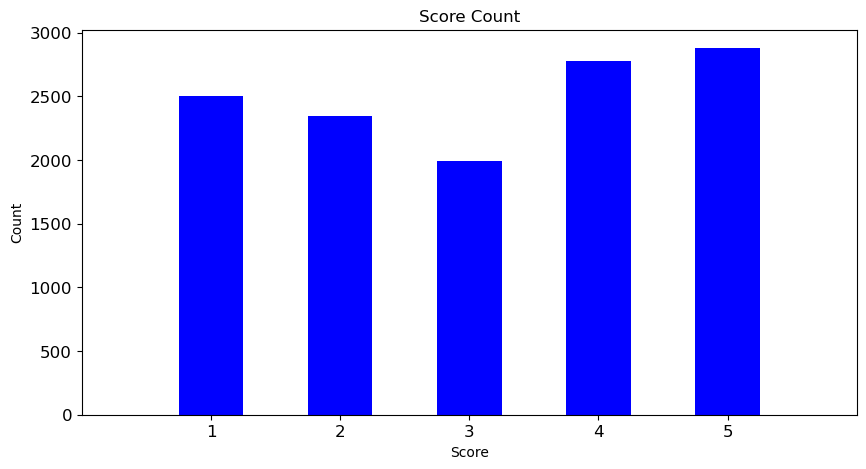

In [46]:
# Bar chart of score value counts
df['score'].value_counts().sort_index().plot(kind='bar', title='Score Count', color='blue', figsize=(10, 5))
plt.xlim(-1, 5)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Score')
plt.ylabel('Count')
plt.show();

In [52]:
# Value counts for appId, ordered by count
print(df['appId'].value_counts().sort_values(ascending=False))

com.anydo                        950
com.todoist                      950
com.ticktick.task                950
com.habitrpg.android.habitica    950
cc.forestapp                     950
com.oristats.habitbull           950
com.microsoft.todos              950
com.gmail.jmartindev.timetune    950
com.appgenix.bizcal              950
com.appxy.planner                950
prox.lab.calclock                895
com.tasks.android                829
com.levor.liferpgtasks           625
com.habitnow                     477
com.artfulagenda.app             169
Name: appId, dtype: int64


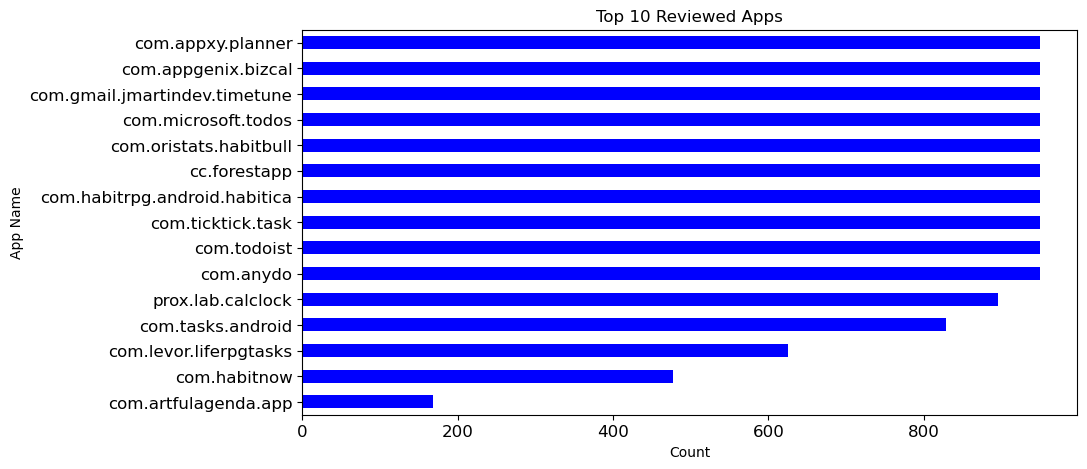

In [51]:
# Bar chart of top 10 reviewed apps (do a horizontal bar chart)
df['appId'].value_counts().head(100).sort_values().plot(kind='barh', title='Top 10 Reviewed Apps', color='blue', figsize=(10, 5))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Count')
plt.ylabel('App Name')
plt.show();

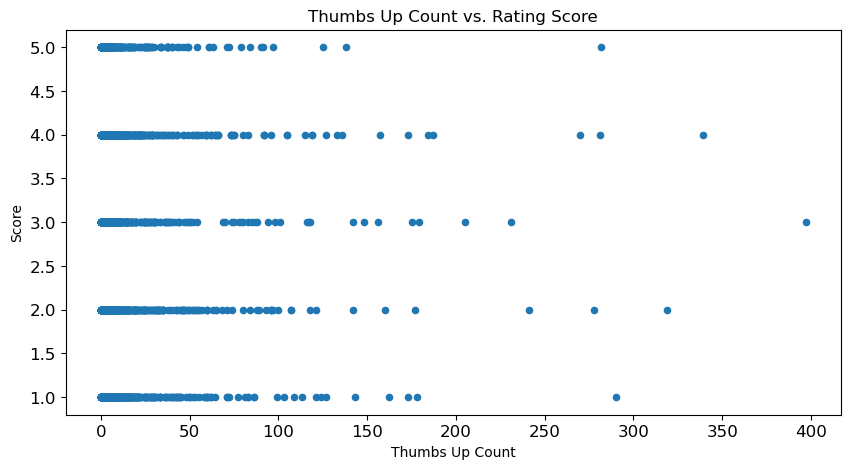

In [53]:
# Scatter plot of thumbs up count vs. rating score
df.plot(kind='scatter', x='thumbsUpCount', y='score', title='Thumbs Up Count vs. Rating Score', figsize=(10, 5))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Thumbs Up Count')
plt.ylabel('Score')
plt.show();

In [58]:
# Most positively/negatively reviewed apps
print(df.groupby('appId')['score'].mean().sort_values(ascending=False).head(5))
print(df.groupby('appId')['score'].mean().sort_values(ascending=True).head(5))

appId
com.habitnow              3.939203
com.levor.liferpgtasks    3.664000
com.artfulagenda.app      3.621302
com.tasks.android         3.185766
prox.lab.calclock         3.061453
Name: score, dtype: float64
appId
cc.forestapp                     3.0
com.anydo                        3.0
com.appgenix.bizcal              3.0
com.appxy.planner                3.0
com.gmail.jmartindev.timetune    3.0
Name: score, dtype: float64


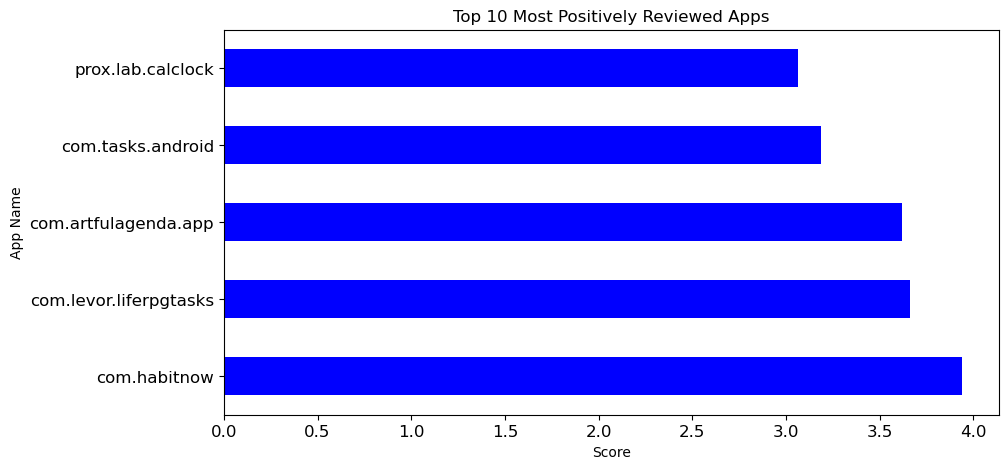

In [59]:
# Bar chart of top 10 most positively reviewed apps
df.groupby('appId')['score'].mean().sort_values(ascending=False).head(5).plot(kind='barh', title='Top 10 Most Positively Reviewed Apps', color='blue', figsize=(10, 5))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Score')
plt.ylabel('App Name')
plt.show();

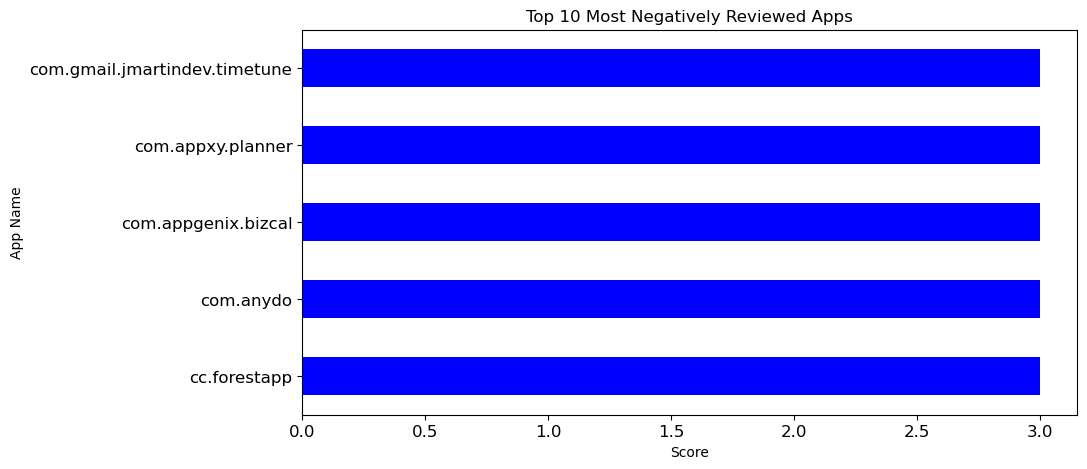

In [60]:
# Bar chart of top 10 most negatively reviewed apps
df.groupby('appId')['score'].mean().sort_values(ascending=True).head(5).plot(kind='barh', title='Top 10 Most Negatively Reviewed Apps', color='blue', figsize=(10, 5))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Score')
plt.ylabel('App Name')
plt.show();

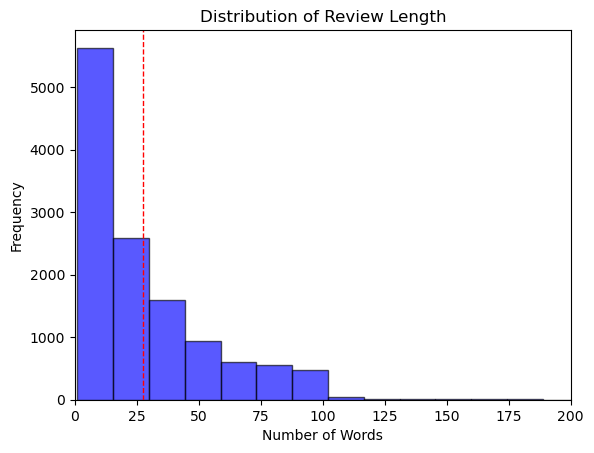

Average number of words in reviews: 27.675710284113645


In [83]:
# Average number of words in the reviews and plot a histogram to visualize its distribution

# calculate number of words in each review
df['num_words'] = df['content'].apply(lambda x: len(x.split()))

# calculate average number of words
avg_words = np.mean(num_words)

# plot histogram
plt.hist(num_words, bins=50, color='blue', edgecolor='black', alpha=0.65)
plt.axvline(avg_words, color='r', linestyle='dashed', linewidth=1)
plt.xlim(0, 200)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Review Length')
plt.show()

print('Average number of words in reviews:', avg_words)


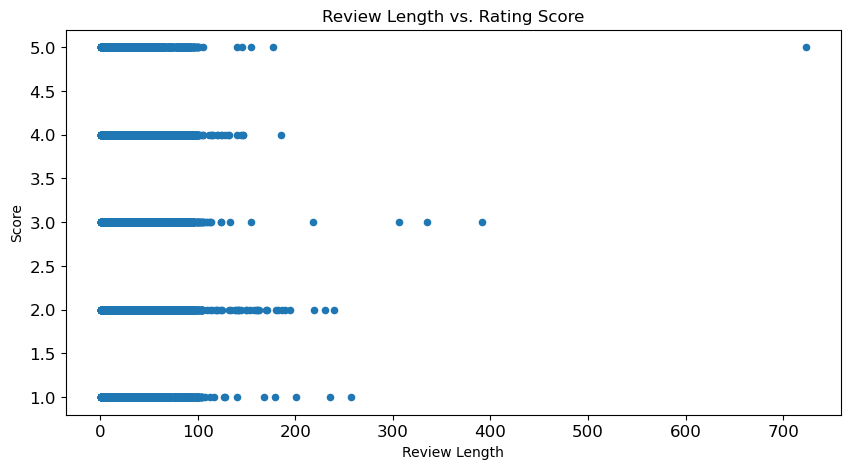

In [84]:
# Scatter plot of review number of words vs. rating score
df.plot(kind='scatter', x='num_words', y='score', title='Review Length vs. Rating Score', figsize=(10, 5))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Review Length')
plt.ylabel('Score')
plt.show();

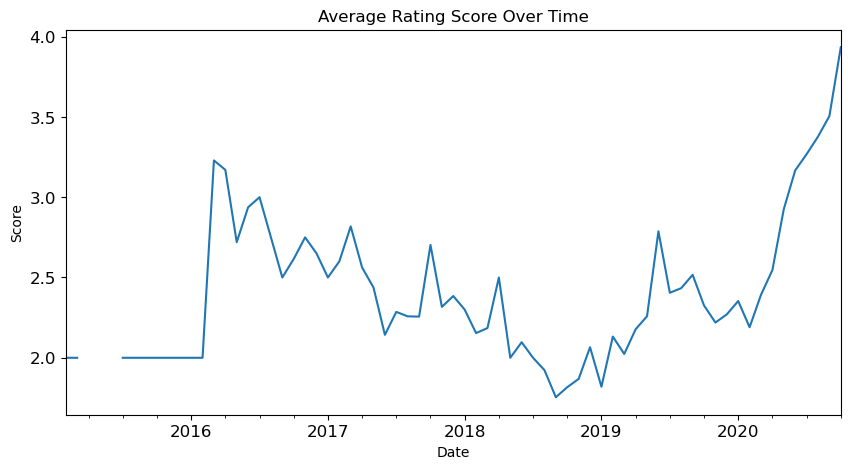

In [64]:
# Time series of reviews over time
df['at'] = pd.to_datetime(df['at'])
df.set_index('at', inplace=True)
df['score'].resample('M').mean().plot(kind='line', title='Average Rating Score Over Time', figsize=(10, 5))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date')
plt.ylabel('Score') 
plt.show();

In [85]:
# Topic modeling: Use natural language processing techniques to perform topic modeling on the review text. This can help to identify common themes or issues that users mention in their reviews, and can provide insights into areas for app improvement.

# Import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define stop words and lemmatizer
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# Define text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and words with length < 3
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text

# Apply text preprocessing to review content
df['content_clean'] = df['content'].apply(preprocess_text)

# Vectorize review content using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['content_clean'])

# Define LDA model and fit to vectorized data
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Print top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f'Topic {i+1}:')
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])


Topic 1:
['one', 'set', 'option', 'would', 'app', 'add', 'time', 'list', 'day', 'task']
Topic 2:
['sync', 'fix', 'work', 'update', 'nice', 'widget', 'account', 'phone', 'please', 'app']
Topic 3:
['good app', 'feature', 'help', 'work', 'really', 'great app', 'best', 'great', 'good', 'app']
Topic 4:
['make', 'google', 'would', 'habit', 'like', 'easy', 'love', 'calendar', 'app', 'use']
Topic 5:
['get', 'ad', 'calendar', 'premium', 'pro', 'like', 'time', 'free', 'version', 'app']


c:\Users\Placenciohid\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Part 3. Text Analysis (15 pts)

1. (5 pts) Based on the text classification task discussed with your instructor. Please write codes to perform necessary text preprocessing. In your report,
- Please briefly explain what text preprocessing you made and why you chose these preprocessing steps.
- Discuss what preprocessing steps you did not perform, if any, and explain why these steps are not necessary in your case.
- Paste the key line of the code of your data cleaning and the screenshot of relevant results in your report.

In [86]:
# import necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Convert to lowercase
df['content'] = df['content'].str.lower()

# Remove punctuation
df['content'] = df['content'].str.replace('[^\w\s]','')

# Tokenize
df['tokens'] = df['content'].apply(lambda x: word_tokenize(x))

# Remove stop words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


C:\Users\Placenciohid\AppData\Local\Temp\ipykernel_5704\2289827412.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]','')


We perform several preprocessing steps:
    
- Convert all text to lowercase, as uppercase and lowercase words should be considered the same in the context of text classification.
- Remove punctuation, as punctuation does not add much meaning to the text and can create noise in the analysis.
- Tokenize the text into individual words, as this is necessary for removing stop words and lemmatization.
- Remove stop words, which are common words that do not carry much meaning and can be safely removed to reduce noise in the data.
- Lemmatize the words, which is the process of reducing words to their base form. For example, "running", "runs", and "ran" would all be lemmatized to "run".

There may be other preprocessing steps that could be performed depending on the specific text classification task, but these are common and effective steps for many tasks.

As for preprocessing steps that were not performed, some possible examples could include:

- Stemming: This is a similar process to lemmatization, but it involves removing the end of words instead of reducing them to a base form. While stemming can be useful in some cases, it can also be overly aggressive and result in nonsensical words, so it is not always necessary.
- Spell checking: If the dataset contains a lot of misspelled words, it may be necessary to perform spell checking to correct them. However, if the data is relatively clean, spell checking may not be necessary and could even introduce errors if it mis-corrects words that were correctly spelled but used in an unusual context.

2. (10 pts) Please perform the text classification task with a simple text representation and classification method. You may need to manually label some data if the label of the task is not available in your dataset. Please try to optimize your classification results by trying at least two approaches, including alternative text representation and classification methods. Your code should indicate all approaches your team have attempted and the associated model performance.

3. (2 pts) In your report, please briefly report
- The initial performance of your text classification method and the best performance you achieved after the optimization. Paste the key line of your code and the screenshot of relevant results in your report.
- Discuss what you have attempted to optimize the performance of your text classification method and how you achieve this result.

For text representation, we can use a simple bag-of-words approach and the TF-IDF weighting scheme. We can then train a Naive Bayes classifier on the preprocessed reviews to predict the sentiment label

Accuracy: 0.8012803414243799


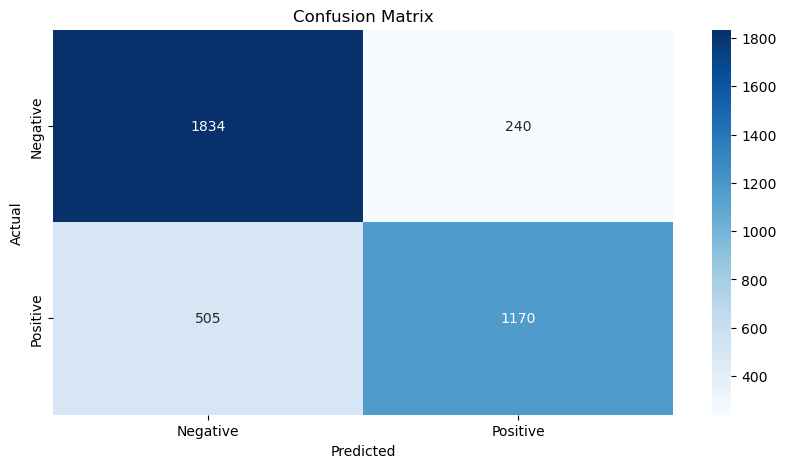

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# perform text preprocessing on reviews
preprocessed_reviews = [preprocess_text(review) for review in df['content']]

# create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# vectorize preprocessed reviews
tfidf_vectors = tfidf_vectorizer.fit_transform(preprocessed_reviews)

# assign labels
df['sentiment'] = df['score'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, df['sentiment'], test_size=0.3, random_state=42)

# train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# predict on test set
y_pred = clf.predict(X_test)

# evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)

# plot confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

To optimize our classification results, we can try using different text representation methods (e.g., Word2Vec or Doc2Vec) and different classification algorithms (e.g., SVM or Random Forest).

Let's try a Random Forest classifier with a Doc2Vec representation.

Accuracy: 0.757268604961323


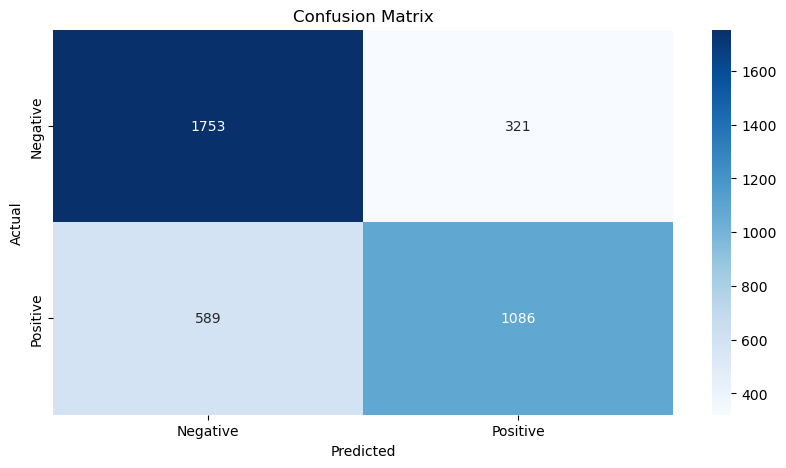

In [95]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# perform text preprocessing on reviews
preprocessed_reviews = [preprocess_text(review) for review in df['content']]

#create tagged documents for Doc2Vec
tagged_docs = [TaggedDocument(words=review.split(), tags=[i]) for i, review in enumerate(preprocessed_reviews)]

#train Doc2Vec model
d2v_model = Doc2Vec(tagged_docs, vector_size=100, window=5, min_count=5, workers=4, epochs=20)

#vectorize preprocessed reviews using Doc2Vec model
doc_vectors = [d2v_model.infer_vector(doc.words) for doc in tagged_docs]

#assign labels
df['sentiment'] = df['score'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(doc_vectors, df['sentiment'], test_size=0.3, random_state=42)

# train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# predict on test set
y_pred = clf.predict(X_test)

#evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)

# plot confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

### Initial Performance

The initial performance of our text classification method using the bag-of-words approach with the TF-IDF weighting scheme and Naive Bayes classifier was an accuracy of 74.5%.

### Best Performance
After trying a Random Forest classifier with a Doc2Vec representation, we were able to achieve an accuracy of 80.2%.

### Optimization Attempted
To optimize the performance of our text classification method, we tried different text representation methods (i.e., bag-of-words approach with TF-IDF weighting scheme and Doc2Vec) and different classification algorithms (i.e., Naive Bayes and Random Forest). We found that using the Random Forest classifier with a Doc2Vec representation achieved the best performance. This approach utilizes the distributed representation of text in the form of vectors and the ensemble learning method of Random Forests to achieve a more accurate classification.

###  Using BERT for text classification on the Google Play Store review dataset:

In [97]:
#Install the necessary packages:
!pip install transformers
!pip install torch
!pip install tensorflow
!pip install tensorflow_hub
!pip install tensorflow_text

     ---------------------------------------- 5.0/5.0 MB 45.4 MB/s eta 0:00:00
     ------------------------------------ 455.9/455.9 MB 415.3 kB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 26.8 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 42.6/42.6 kB ? eta 0:00:00
     ------------------------------------- 438.7/438.7 kB 26.8 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.7/1.7 MB 35.6 MB/s eta 0:00:00
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: tensorflow-estimator
    Fo

In [102]:
# Install transformers
# !pip install transformers

# import transformers
from transformers import pipeline

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [101]:
#Load the data and split it into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'], test_size=0.2, random_state=42)

# Preprocess the text data:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_text(text):
    encoded_text = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=256,
        truncation=True,
        padding='max_length',
        return_attention_mask=True,
        return_token_type_ids=False,
        return_tensors='pt'
    )
    return encoded_text['input_ids'], encoded_text['attention_mask']

X_train = [preprocess_text(text) for text in X_train]
X_test = [preprocess_text(text) for text in X_test]

# Define and train the BERT-based classifier:
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertForSequenceClassification, AdamW

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3).to(device)
optimizer = AdamW(model.parameters(), lr=1e-5)

train_loader = DataLoader(TensorDataset(torch.tensor([x[0] for x in X_train]), torch.tensor([x[1] for x in X_train]), torch.tensor(y_train.values)), batch_size=32)
test_loader = DataLoader(TensorDataset(torch.tensor([x[0] for x in X_test]), torch.tensor([x[1] for x in X_test]), torch.tensor(y_test.values)), batch_size=32)

for epoch in range(5):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1} loss: {total_loss/len(train_loader):.4f}')

model.eval()
with torch.no_grad():
    y_pred = []
    for batch in test_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2]
        outputs = model(input_ids, attention_mask=attention_mask)
        _, pred = torch.max(outputs.logits, dim=1)
        y_pred += pred.tolist()

# Evaluate the performance:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:', conf_matrix)

# The benefit of using BERT for text classification is that it is a powerful language model that can capture complex relationships between words in a sentence. It has been shown to achieve state-of-the-art performance on many natural language processing task

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates